# Basic PVT Setup and Example

In [1]:
import time
from ia.gaius.manager import AgentManager
from ia.gaius.pvt import PerformanceValidationTest

/usr/lib/python3/dist-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import ia
ia.__version__

'0.4.0'

In [3]:
am = AgentManager()

In [4]:
agent = am.start_agent(genome_name='simple.genome',
                       agent_id='pvt',
                       user_id='tutorial',
                       agent_name='tutorial-pvt').get_agent_client()

In [5]:
time.sleep(0.5)
agent.connect()

{'connection': 'okay', 'agent': 'simple'}

In [6]:
agent.show_status()

{'AUTOLEARN': False,
 'PREDICT': True,
 'SLEEPING': False,
 'SNAPSHOT': False,
 'emotives': {},
 'last_learned_model_name': '',
 'models_kb': '{KB| objects: 0}',
 'name': 'P1',
 'num_observe_call': 0,
 'size_WM': 0,
 'target': '',
 'time': 0,
 'vector_dimensionality': -1,
 'vectors_kb': '{KB| objects: 0}'}

In [7]:
agent.get_all_genes(nodes=['P1'])

{'genes': {'SORT': 'sorting',
  'always_update_frequencies': False,
  'auto_learn_algorithm': 'basic',
  'auto_learn_metric': 'wm_size',
  'classifier': 'CVC',
  'enable_genome_snapshots': 'genome snapshots enabled',
  'enable_snapshots': 'WM snapshots disabled',
  'max_predictions': 100,
  'max_sequence_length': 0,
  'near_vector_count': 3,
  'persistence': 5,
  'predict_on_nth_event': 1,
  'prediction_sort_metric': 'potential',
  'prediction_threshold': 0,
  'prediction_threshold_direction': 'greater than',
  'prediction_threshold_metric': 'potential',
  'quiescence': 3,
  'recall_threshold': 0.1,
  'search_depth': 10,
  'smoothness': 3,
  'snapshot_gen_predictions': 'prediction generation on snapshot load disabled',
  'snapshot_sync_keys': '[]',
  'wm_resolution': 'symbol'}}

## Iris Dataset Training

In [8]:
pvt = PerformanceValidationTest(agent=agent,
                                ingress_nodes=['P1'],
                                query_nodes=['P1'],
                                test_count=1,
                                dataset_percentage=100,
                                training_percentage=80,
                                test_type='classification',
                                dataset='../../../tests/datasets/shuffled_iris_flowers',
                                test_prediction_strategy='noncontinuous',
                                clear_all_memory_before_training=True,
                                turn_prediction_off_during_training=False,
                                shuffle=True,
                                PLOT=True)

  0%|           0/120 [? ? records/s]

  0%|           0/30 [? ? records/s]

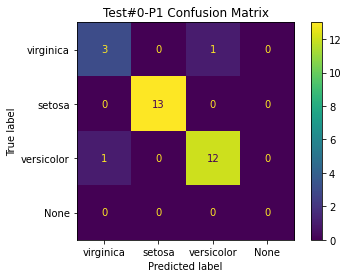

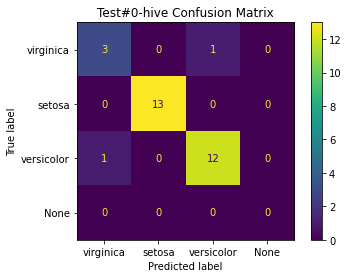

In [9]:
pvt.conduct_pvt()

In [10]:
pvt.pvt_results[0]['P1']['metrics']

{'training_counter': {'virginica': 46, 'setosa': 37, 'versicolor': 37},
 'testing_counter': {'versicolor': 13, 'setosa': 13, 'virginica': 4},
 'counter': {'virginica': 50, 'setosa': 50, 'versicolor': 50},
 'predicted_class_statistics': {'versicolor': 13,
  'setosa': 13,
  'virginica': 4},
 'response_counts': 30.0,
 'true_positive': 28.0,
 'false_positive': 2.0,
 'precision': 93.33333333333333,
 'f1': 0.9655172413793104,
 'accuracy': 93.33333333333333,
 'response_percentage': 100.0,
 'unknown_percentage': 0.0,
 'true_negative': 0.0,
 'false_negative': 0.0,
 'FPR': 100.0,
 'FDR': 6.666666666666667,
 'TNR': 0.0,
 'TPR': 100.0,
 'NPV': 0.0,
 'FNR': 0.0,
 'FOR': 0.0,
 'LR+': 1.0,
 'LR-': 0.0,
 'PT': 0.5,
 'TS': 93.33333333333333}

In [11]:
am.delete_agent('tutorial-pvt')

'deleted /home/alexlukens/.local/share/IA_SDK_AgentManager/agents/tutorial-pvt'